In [1]:
import  numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

In [2]:
N = 400 # Número de amostras do sinal
fs = 1e3  # Frequência de amostragem
# Relação importante N = int(T*fs)
T  = N/fs # Tempo simulação
print(T)
Ts = 1 /fs
t  = np.linspace(0,N-1,N)*Ts# Tempo t


0.4


Text(0, 0.5, 'm (t)')

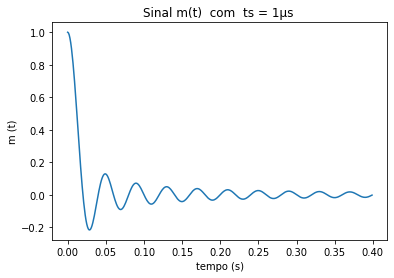

In [3]:
# Sinal mensagem m(t)
#fm  = 100 #frequencia Fm
Amplitude = 1
m_t = Amplitude * np.sinc(50*t) # A*sinc(50t)
plt.plot(t,m_t)
plt.title('Sinal m(t)  com  ts = 1µs ')
plt.xlabel('tempo (s)')
plt.ylabel('m (t)')

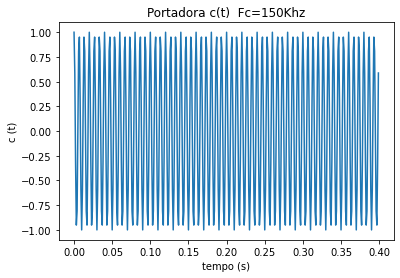

In [4]:
# Portadora
fc  = 150 #frequencia da portadora 150 k
A_c = 1 #amplitude da portadora
c_t = A_c * np.cos(2*np.pi*fc*t) # Sinal da portadora (Oscilador local do transmissor)
plt.plot(t,c_t)
plt.title('Portadora c(t)  Fc=150Khz')
plt.xlabel('tempo (s)')
plt.ylabel('c (t)')
# modulação DSB-AM
# u(t) = m(t)*c(t)
# u(t) = Ac[1 + a*m_n(t)]cos(2*pi*fc*t) -> Será utilizado no relatório esses esquema!!!!

# Sinal DSB-AM com adição de portadora
a = 0.8 # 0<a<0.8 #índice de modulação
m_n = m_t/np.max(m_t)
u_DSB = (1+a*m_n)*c_t
#u_DSB  = m_t*c_t é a mensagem modulada

Text(0, 0.5, 'Sinal DSB')

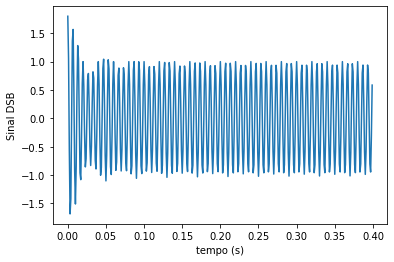

In [5]:
plt.plot(t,u_DSB)
plt.xlabel('tempo (s)')
plt.ylabel('Sinal DSB')

In [6]:
#transformada da entrada convoluida com a portadora
U_f = np.fft.fftshift(np.fft.fft(u_DSB))
f   = np.linspace(-fs/2,fs/2,N)

Text(0, 0.5, 'Especto do Sinal DSB')

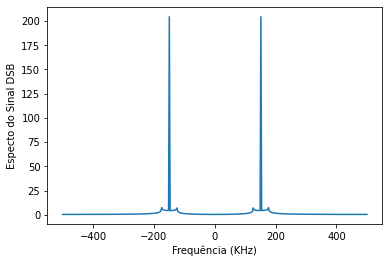

In [7]:
plt.plot(f,np.abs(U_f))
plt.xlabel('Frequência (KHz)')
plt.ylabel('Especto do Sinal DSB')

In [8]:
# Demodulação
# 1 - Mixer -> Multiplicação do sinal recebido pelo cos(2*pi*fc*t + phi)
# 2 - Filtro passa-baixa -> Projeto de filtro passa-baixa

phi = 0 #np.pi/8
c_r = A_c*np.cos(2*np.pi*fc*t + phi)
r   = u_DSB*c_r

Text(0, 0.5, 'Sinal DSB ')

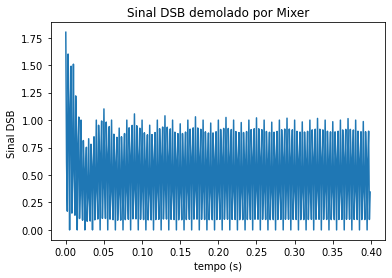

In [9]:
plt.plot(t,r)
plt.title('Sinal DSB demolado por Mixer')
plt.xlabel('tempo (s)')
plt.ylabel('Sinal DSB ')

In [10]:
R_f = np.fft.fftshift(np.fft.fft(r))

Text(0, 0.5, 'Especto do Sinal DSB')

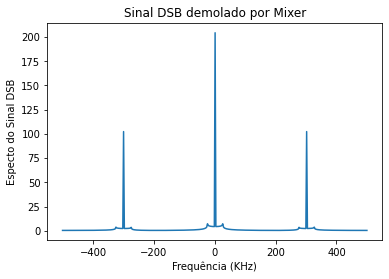

In [11]:
plt.plot(f,np.abs(R_f))
plt.title('Sinal DSB demolado por Mixer')
plt.xlabel('Frequência (KHz)')
plt.ylabel('Especto do Sinal DSB')

In [12]:
def butter_lowpass(cutoff, fs, order=6):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=6):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [13]:
cutoff = 100
g_t  = butter_lowpass_filter(r,cutoff,fs)


In [14]:
G_f = np.fft.fftshift(np.fft.fft(g_t))

Text(0, 0.5, 'Sinal filtrado')

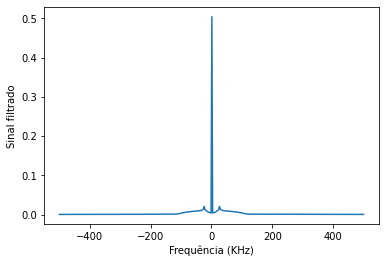

In [15]:
plt.plot(f,np.abs(G_f)/N)
plt.xlabel('Frequência (KHz)')
plt.ylabel('Sinal filtrado')

Text(0.5, 1.0, ' φ = 0')

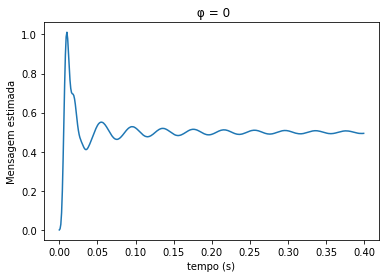

In [16]:



plt.plot(t,g_t)
#plt.plot(t,m_t)
#plt.plot(t[0:1000],4*(g_t[0:1000] - A_c/2))
#plt.plot(t[0:1000],m_t[0:1000])
plt.xlabel('tempo (s)')
plt.ylabel('Mensagem estimada')
plt.title(' φ = 0')

In [17]:
# lembre-se da defasagem entre os osciladores
# mensagem estimada será  K + g_t*cos(phi).

